In [60]:
# block 1: import all important libraries
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 


In [61]:
# block 2: Import the used data file and create a variable with the data in the file
acorn_URL = "/media/z3525831/EMTEC/UNSW2/Data HF radar/data_2012_2013.nc"
acorn_DATA = Dataset(acorn_URL) 
coastline = "/media/z3525831/EMTEC/UNSW2/Data trait de cote/eaccoast (1).dat"
coast=np.loadtxt(coastline)

In [62]:
# block 3: Creation and conversion of date and time variables (number with classical date format)
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar
times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)

In [63]:
# block 4: Extracting the U/V/speed/lat/long/time data from the import file and assigns them to a variable
uData = acorn_DATA.variables['UCUR'][:,:,:] # 3 dimensions - t,x,y
vData = acorn_DATA.variables['VCUR'][:,:,:]
spData = (uData**2 + vData**2)**0.5 
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']


In [64]:
# block 5: define new variables with lat, long, and speedmean and powermean with the right shape for the plot
timeIndex = 50
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]
speedMean = np.mean(spData, axis = 0)
P = 0.5*1025*1*(speedMean*speedMean*speedMean)
Power = P/1000

In [65]:
# block 6: Creation of U, V variables according to UCUR and VCUR data and time
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

(152.7, 154.4)

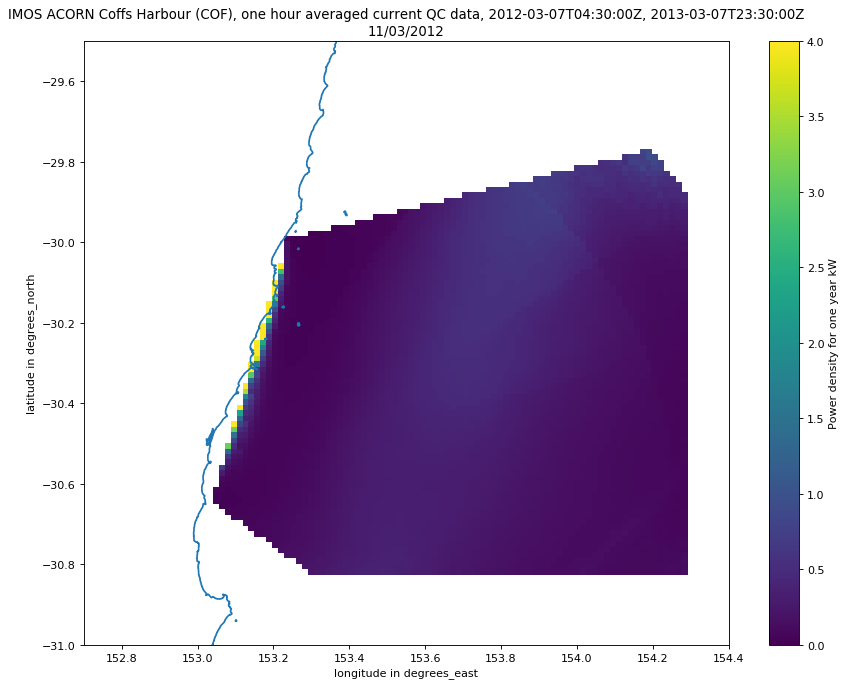

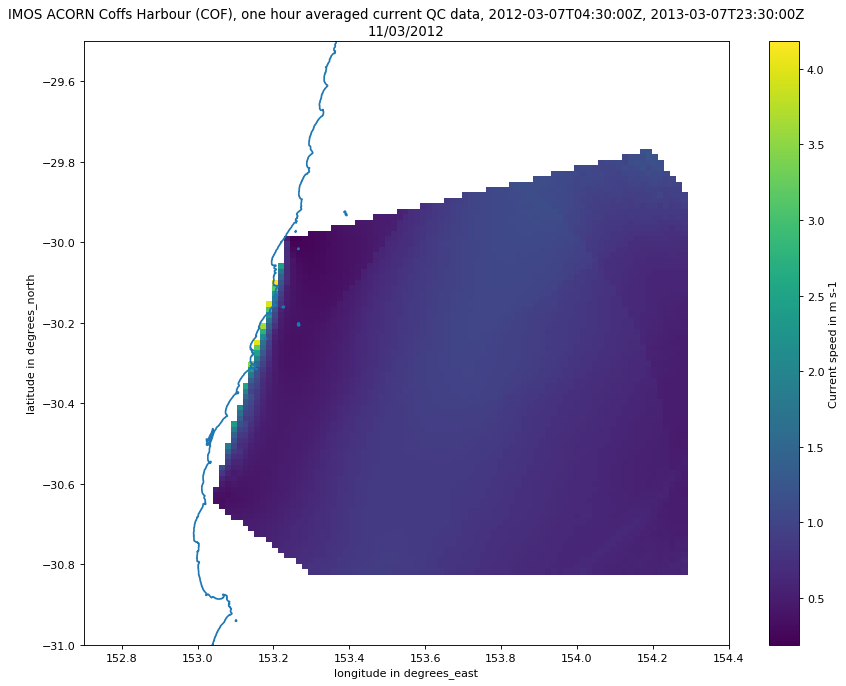

In [66]:
# block 7: Chart configuration:
#      - axis, color, size
#      - coastline background
#      - label and colorbar
#      - title
#       -Speedmean and powermean

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, Power, vmin=0, vmax=4) 
cbar = colorbar()
cbar.ax.set_ylabel('Power density for one year kW' )
title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

#plot the coastline
plt.plot(coast[:,0],coast[:,1])
plt.ylim(-31, -29.5)     
plt.xlim(152.7, 154.4)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedMean) 
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)
title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)


plt.plot(coast[:,0],coast[:,1])
plt.ylim(-31, -29.5)     
plt.xlim(152.7, 154.4)